In [9]:
%reset -f
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the parent directory to the path in order to import the module
sys.path.append("..")
import yaml
from pathlib import Path
from settings import Settings

# Add the parent directory to the path in order to import the module
sys.path.append("..")

with open("../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

settings = Settings(**config)
data = pd.read_csv(f"{settings.results_dir.as_posix()}/{settings.system}_data.csv")
insect_mapping = settings.insect_labels_map[settings.system]
inv_insect_mapping = {v: k for k, v in insect_mapping.items()}
data['txt_pred'] = data['y_pred'].map(inv_insect_mapping)
data['txt_true'] = data['y_true'].map(inv_insect_mapping)

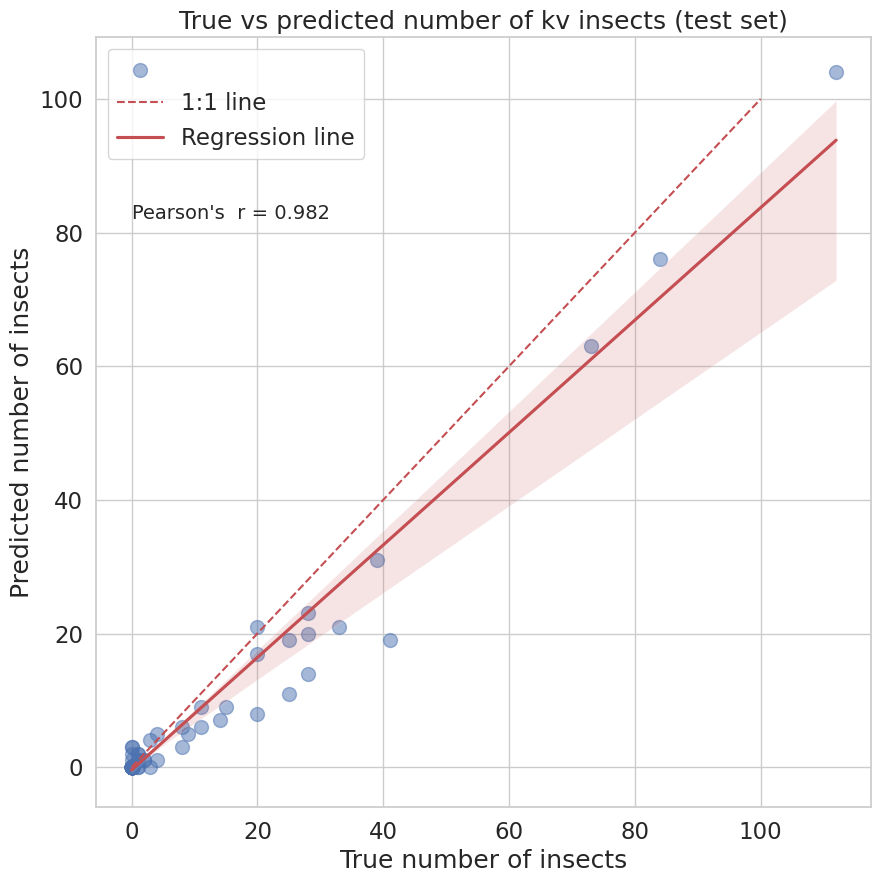

In [11]:
insect = "kv"
ins_pred, ins_true = [], []
for i, sub in data.groupby('platename_uniq'):
    ins_pred.append(sub['txt_pred'].value_counts().get(insect, 0))
    ins_true.append(sub['txt_true'].value_counts().get(insect, 0))

# Read test_plate_names.txt
with open(f"{settings.results_dir.as_posix()}/test_plate_names.txt", "r") as f:
    test_plate_names = f.read().splitlines()

set(test_plate_names) == set(data['platename_uniq'].unique())

# Let's make a scatterplot with the true vs predicted number of insects for 'insect'
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(10, 10))
plt.scatter(x=ins_true, y=ins_pred, s=100, alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("True number of insects")
plt.ylabel("Predicted number of insects")
plt.title(f"True vs predicted number of {insect} insects (test set)")
# Add seaborn regression line and correlation coefficient as text
sns.regplot(x=ins_true, y=ins_pred, scatter=False, color='r')
corr = np.corrcoef(ins_true, ins_pred)[0, 1]
plt.text(0, 82, f"Pearson's  r = {corr:.3f}", fontsize=14)
# Let's add a legend with red dashed line and prediction line
plt.legend(["", "1:1 line", "Regression line"])
plt.show()

## The results above are already filtered to contain only user verified data.
### The analysis should be made with all data instead.